## Project Name: Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis
- Feature Engineering
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Let us import our Data Set


In [3]:
df= pd.read_csv("/content/heart.csv")

In [4]:
df= df.drop(['oldpeak'],axis=1)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,3,2,0


### Data Analysis

### Understanding  DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:

df.shape

(1025, 13)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### As we can see there are no null values in our Data Set

In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,-0.267335,0.107849,0.197201,-0.438029
slope,-0.169105,-0.026666,0.131633,-0.120445,-0.014248,-0.061902,0.086086,0.395308,-0.267335,1.000000,-0.073440,-0.094090,0.345512


#### As we can see our variables are not highly correlated to each other

#### We will do Uni and Bi variate analysis on our Features

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

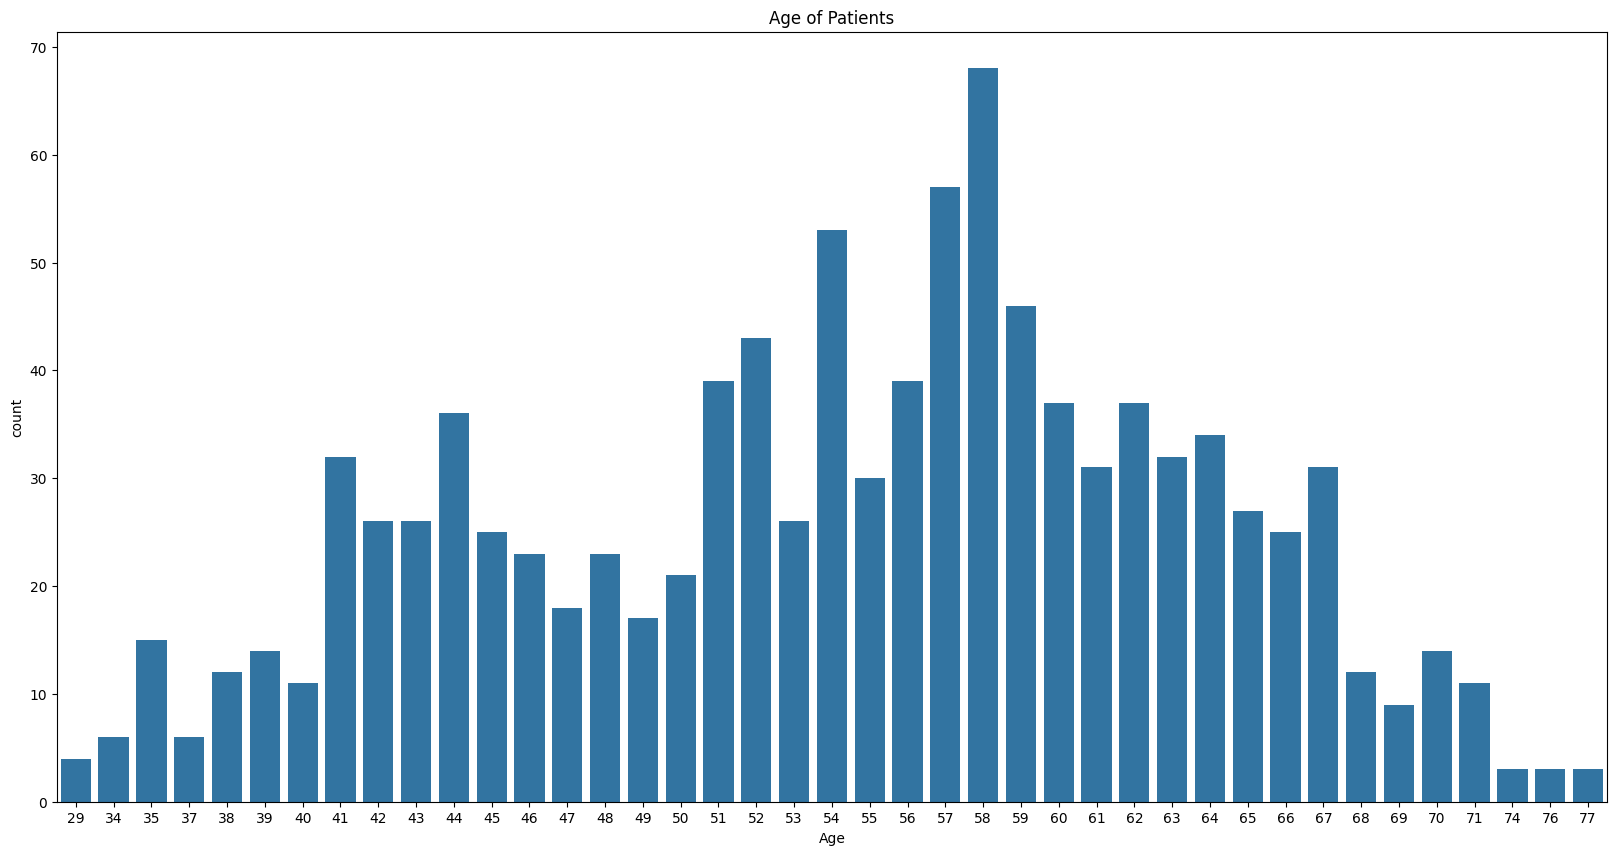

In [9]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

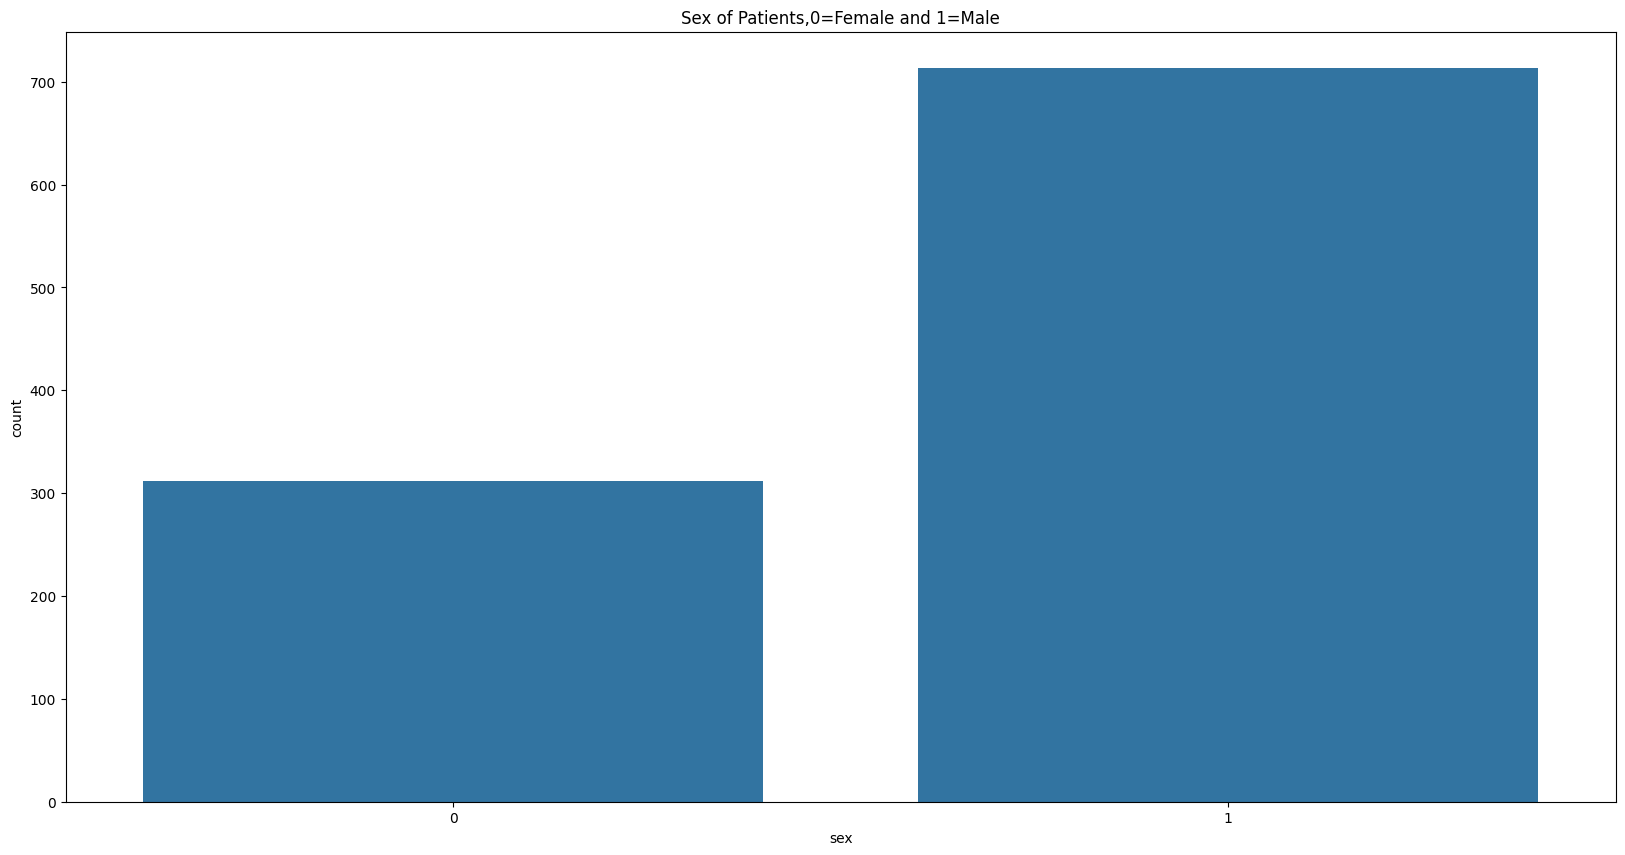

In [10]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [11]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['Chest Pain Type', 'Count']
cp_data['Chest Pain Type'] = cp_data['Chest Pain Type'].replace({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'})
cp_data


,Chest Pain Type,Count
0,Typical Angina,497
1,Non-Anginal Pain,284
2,Atypical Angina,167
3,Asymptomatic,77


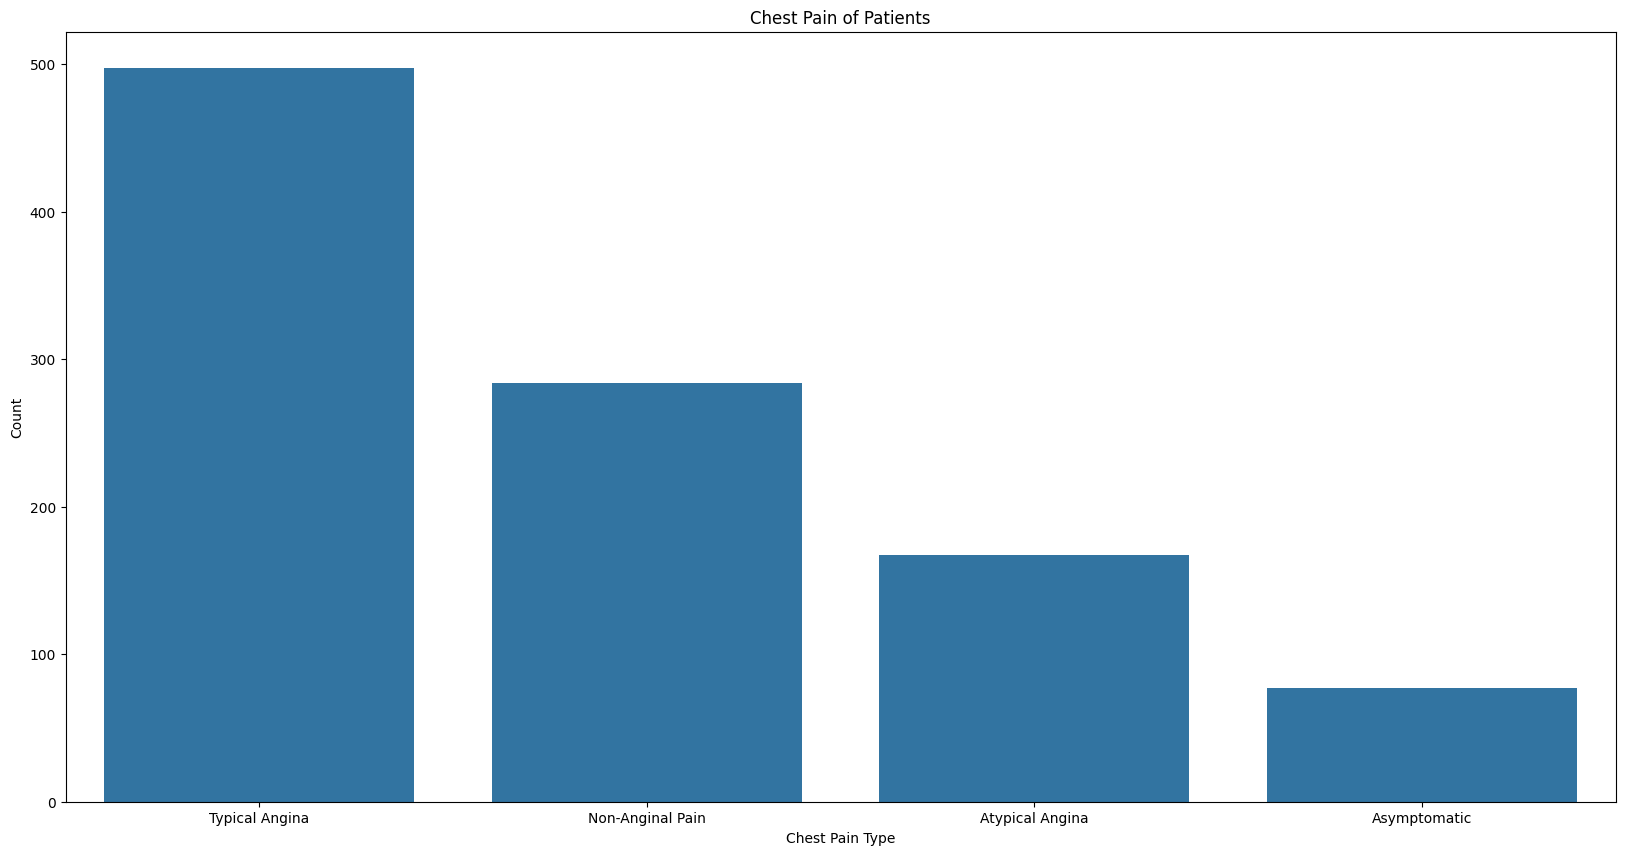

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")
sns.barplot(x=cp_data['Chest Pain Type'], y=cp_data['Count'])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


#### We have seen how the the Chest Pain Category is distributed

In [13]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.columns = ['Rest ECG', 'Count']
ecg_data['Rest ECG'] = ecg_data['Rest ECG'].replace({0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'})
ecg_data


,Rest ECG,Count
0,ST-T Wave Abnormality,513
1,Normal,497
2,Left Ventricular Hypertrophy,15


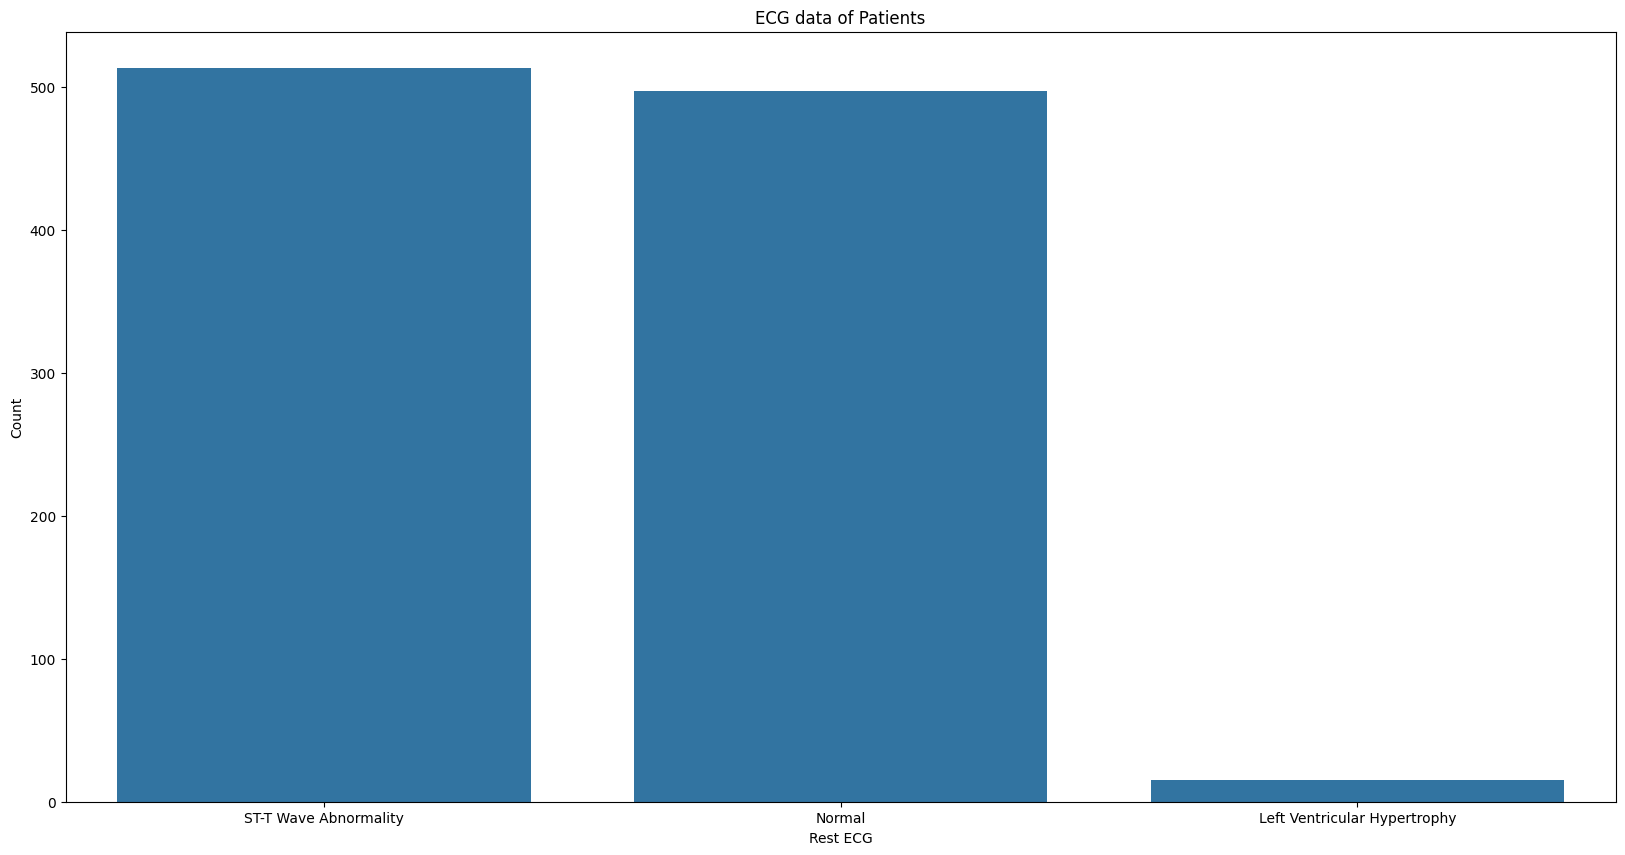

In [14]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")
sns.barplot(x=ecg_data['Rest ECG'], y=ecg_data['Count'])
plt.xlabel("Rest ECG")
plt.ylabel("Count")
plt.show()


#### This is our ECG Data

### Let us see for our Continuous Variable

<ipython-input-15-ebe894739d0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color = 'red')


Text(0.5, 0, 'Cholestrol')

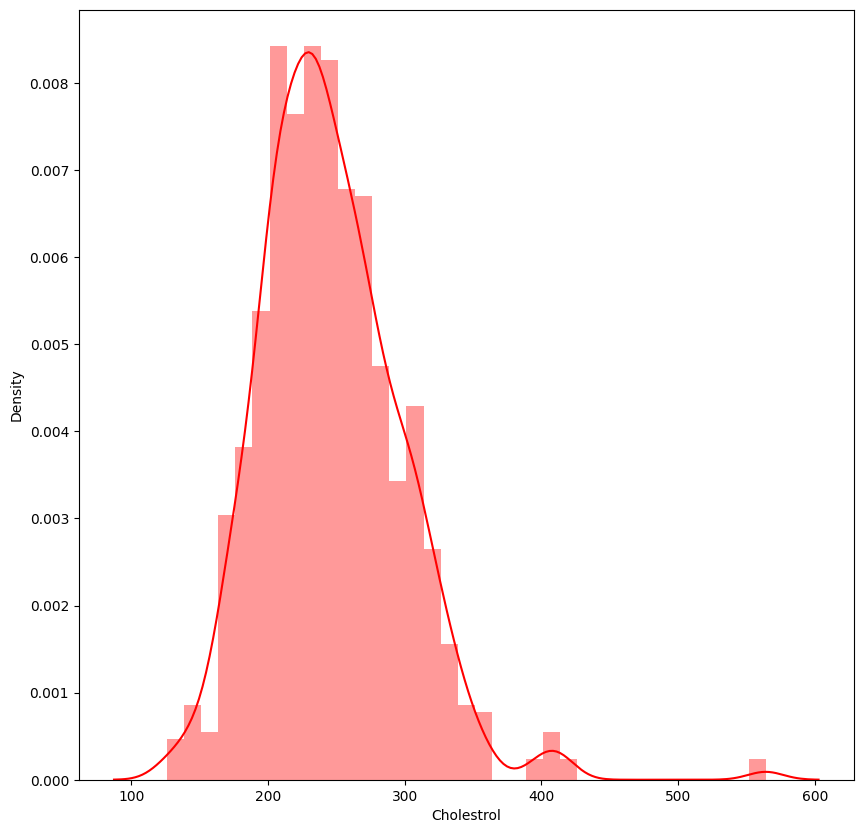

In [15]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,3,2,0


### Let us do Standardisation

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scale=StandardScaler()

In [19]:
scale.fit(df)

StandardScaler()

### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [20]:
# Define x (features) and y (target variable)
x = df.drop(columns=['target'])  # Assuming 'output' is the target variable
y = df['target']  # Assuming 'output' is the target variable


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lbl= LabelEncoder()

In [25]:
encoded_y= lbl.fit_transform(y_train)

In [26]:
logreg= LogisticRegression()

In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
encoded_ytest= lbl.fit_transform(y_test)

In [30]:
# Fit the Logistic Regression model with training data
logreg.fit(x_train, y_train)

# Make predictions on the test data
Y_pred1 = logreg.predict(x_test)

# Calculate confusion matrix
lr_conf_matrix = confusion_matrix(y_test, Y_pred1)

# Calculate accuracy score
lr_acc_score = accuracy_score(y_test, Y_pred1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [32]:
lr_conf_matrix

array([[121,  38],
       [ 21, 128]])

In [33]:
print(lr_acc_score*100,"%")

80.84415584415584 %


#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree= DecisionTreeClassifier()

In [36]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [37]:
ypred2=tree.predict(x_test)

In [38]:
encoded_ytest= lbl.fit_transform(y_test)

In [39]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [40]:
tree_conf_matrix

array([[159,   0],
       [  9, 140]])

In [41]:
print(tree_acc_score*100,"%")

97.07792207792207 %


#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

In [ ]:
import pickle


In [ ]:
# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

# Make predictions
Y_pred1 = logreg.predict(x_test)

# Calculate accuracy
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
